# Assignment 6: Use all the resampling techniques & cross validation techniques & measure the accuracy using KNN Classifier. Compare the accuracy with sampling data & without sampling data.

## Importing Important Libraries

In [1]:
import gradio as gr
import joblib as jb
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import sklearn.cluster as cluster
import warnings
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from IPython.display import Image
from kneed import KneeLocator
from matplotlib import pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

## How The Data Looks Like!

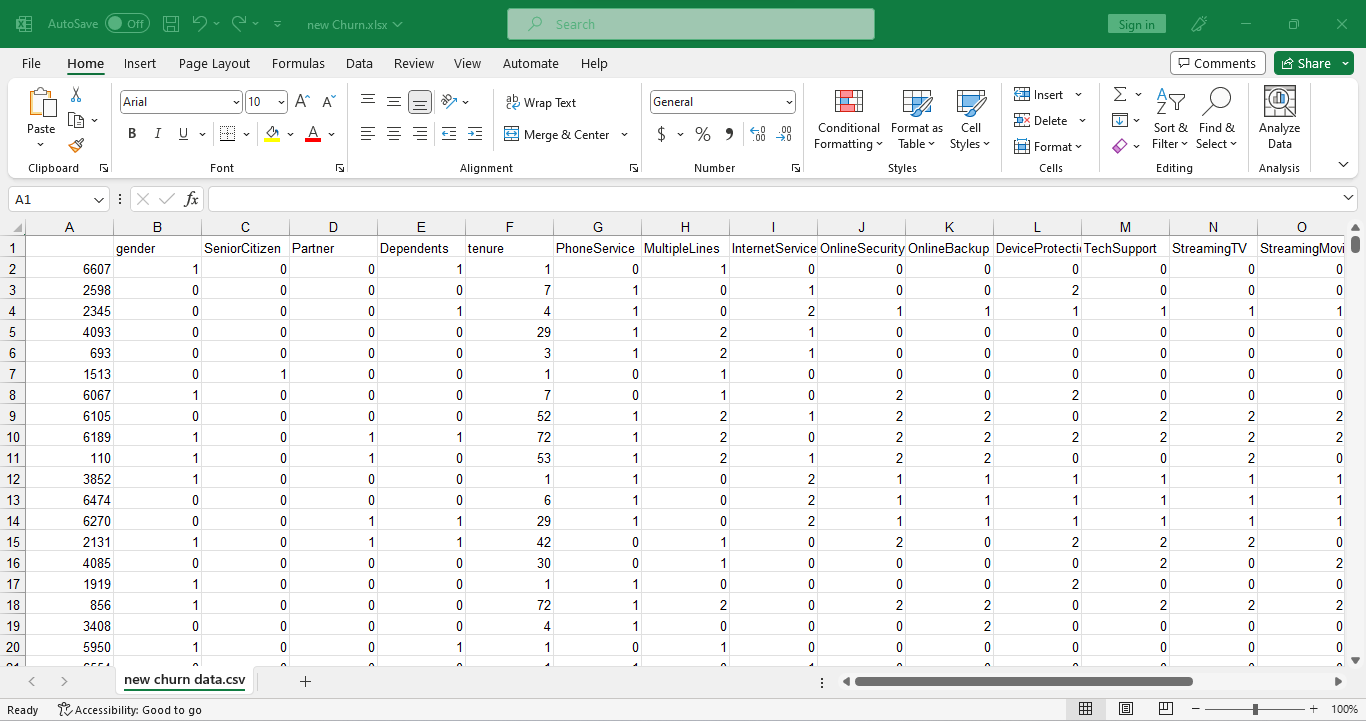

In [2]:
Image('data.png')

## Data Analysis

In [3]:
df = pd.read_excel('new Churn.xlsx')

In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [5]:
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [6]:
df.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,...,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,3548.566641,0.513631,0.159788,0.484476,0.300265,32.413858,0.903635,0.952480,0.872586,0.788716,...,0.897009,0.793260,0.990913,0.995456,0.691405,0.587656,1.572889,64.762609,3271.963839,0.263158
std,2030.343422,0.499861,0.366444,0.499806,0.458417,24.489220,0.295119,0.949499,0.738896,0.859161,...,0.878747,0.860266,0.884717,0.884752,0.831699,0.492303,1.069134,30.125932,1886.476192,0.440389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1806.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.450000,1616.250000,0.000000
50%,3562.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,3274.500000,0.000000
75%,5304.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4915.750000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.600000,6530.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5282 non-null   int64  
 1   gender            5282 non-null   int64  
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   int64  
 4   Dependents        5282 non-null   int64  
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   int64  
 7   MultipleLines     5282 non-null   int64  
 8   InternetService   5282 non-null   int64  
 9   OnlineSecurity    5282 non-null   int64  
 10  OnlineBackup      5282 non-null   int64  
 11  DeviceProtection  5282 non-null   int64  
 12  TechSupport       5282 non-null   int64  
 13  StreamingTV       5282 non-null   int64  
 14  StreamingMovies   5282 non-null   int64  
 15  Contract          5282 non-null   int64  
 16  PaperlessBilling  5282 non-null   int64  


In [9]:
df.isna().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.shape

(5282, 21)

In [11]:
df.corr()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.000100,0.000731,-0.001294,-0.011669,0.001884,-0.034278,-0.013540,-0.018709,-0.006494,...,-0.013033,0.006410,-0.005278,-0.020546,-0.003440,0.010875,0.025083,-0.014253,0.015267,0.010374
gender,-0.000100,1.000000,-0.005691,-0.010143,0.011058,0.001303,-0.009706,-0.000430,-0.005294,-0.020189,...,-0.009305,-0.010619,-0.012994,-0.011420,0.000555,-0.014090,0.010188,-0.018822,-0.022718,-0.011997
SeniorCitizen,0.000731,-0.005691,1.000000,0.016648,-0.211271,0.006176,0.000581,0.129040,-0.040186,-0.129719,...,-0.015922,-0.151078,0.024338,0.043124,-0.151939,0.156417,-0.035050,0.219945,0.040956,0.146549
Partner,-0.001294,-0.010143,0.016648,1.000000,0.447629,0.382432,0.031578,0.151068,0.007205,0.159928,...,0.168815,0.132582,0.136715,0.122310,0.303243,-0.020634,-0.160535,0.105603,0.069859,-0.150053
Dependents,-0.011669,0.011058,-0.211271,0.447629,1.000000,0.162933,-0.005830,-0.020722,0.041972,0.157262,...,0.076783,0.137274,0.045948,0.023907,0.243080,-0.109935,-0.040414,-0.114920,-0.013196,-0.164490
tenure,0.001884,0.001303,0.006176,0.382432,0.162933,1.000000,0.005912,0.354790,-0.032037,0.325451,...,0.369331,0.326993,0.288135,0.301600,0.671184,0.004043,-0.360323,0.253605,0.152843,-0.345544
PhoneService,-0.034278,-0.009706,0.000581,0.031578,-0.005830,0.005912,1.000000,-0.016345,0.385682,-0.007874,...,0.000422,-0.006139,0.055390,0.048362,0.005342,0.014489,0.006362,0.247419,0.081045,0.010122
MultipleLines,-0.013540,-0.000430,0.129040,0.151068,-0.020722,0.354790,-0.016345,1.000000,-0.105796,0.006028,...,0.132798,0.019266,0.172380,0.188860,0.120023,0.172369,-0.176313,0.436398,0.118773,0.031270
InternetService,-0.018709,-0.005294,-0.040186,0.007205,0.041972,-0.032037,0.385682,-0.105796,1.000000,-0.027201,...,0.048320,-0.018510,0.101060,0.092672,0.097158,-0.141856,0.095054,-0.325588,-0.064748,-0.048820
OnlineSecurity,-0.006494,-0.020189,-0.129719,0.159928,0.157262,0.325451,-0.007874,0.006028,-0.027201,1.000000,...,0.182355,0.276510,0.057760,0.065996,0.371159,-0.146473,-0.085892,-0.049605,0.036493,-0.288926


In [12]:
df.nunique()

Unnamed: 0          5282
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1464
TotalCharges        4972
Churn                  2
dtype: int64

In [13]:
df.dtypes

Unnamed: 0            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

### Dataset Modeling

#### Heatmap of the Correlation of the Dataset

<Axes: >

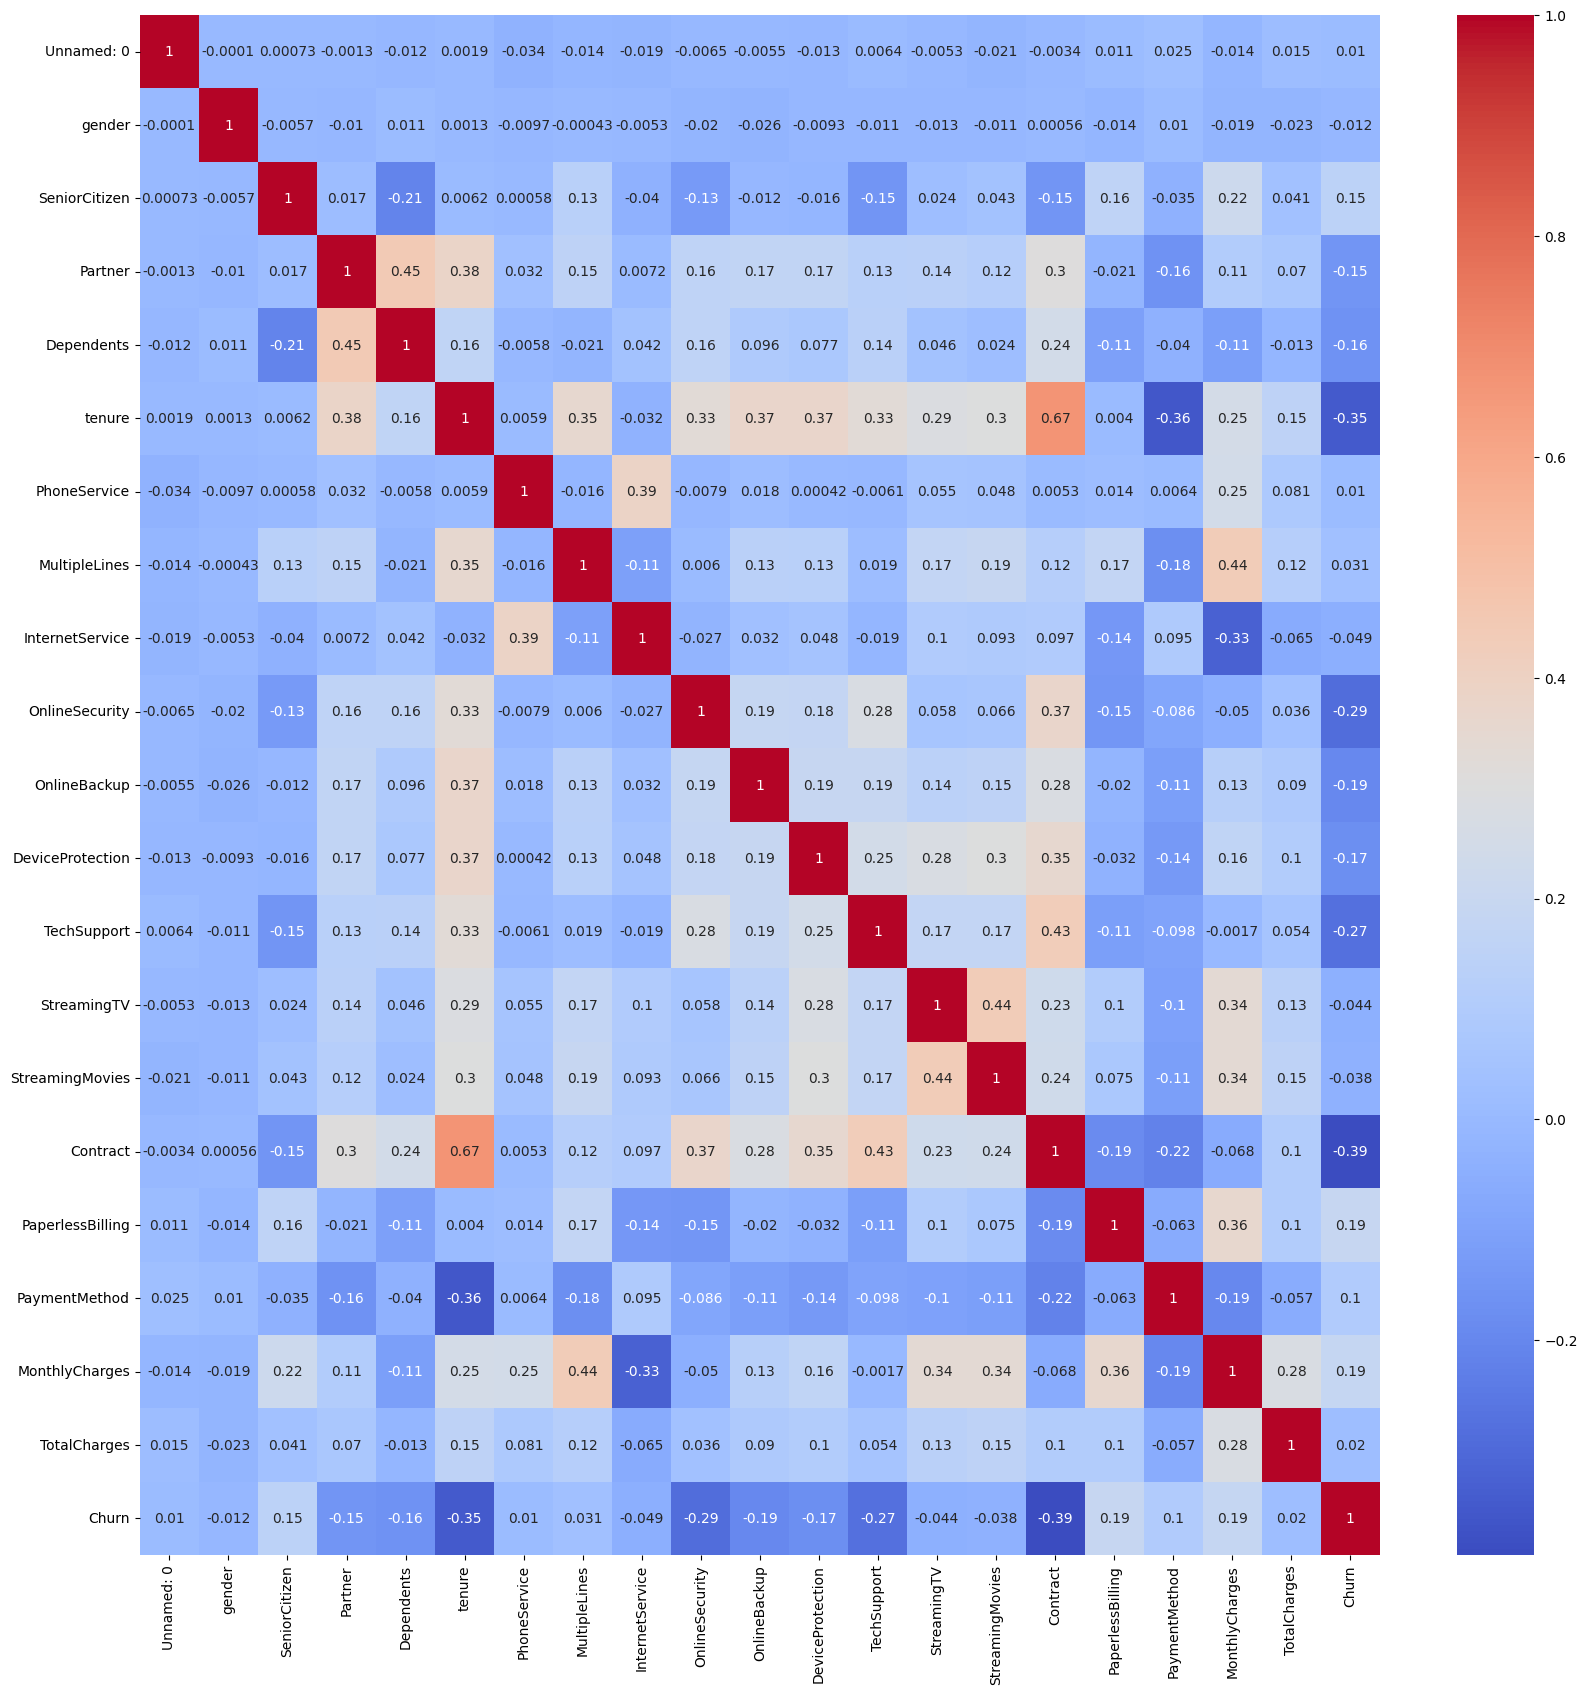

In [14]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

#### Displot of tenure, Monthly Charges & Total Charges

##### Displot of tenure

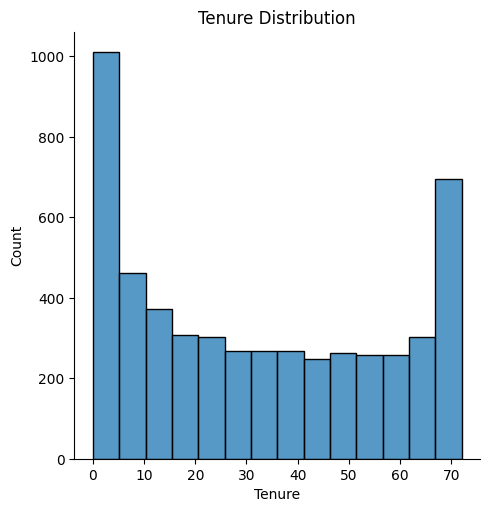

In [15]:
sns.displot(df['tenure']).set(title = 'Tenure Distribution', xlabel = 'Tenure', ylabel = 'Count')

##### Displot of Monthly Charges

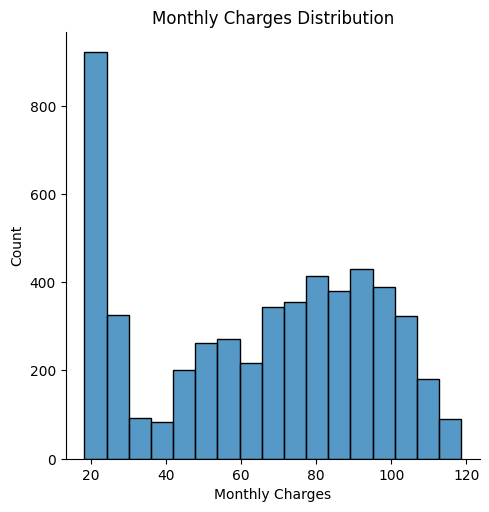

In [16]:
sns.displot(df['MonthlyCharges']).set(title = 'Monthly Charges Distribution', xlabel = 'Monthly Charges', ylabel = 'Count')

##### Displot of Total Charges

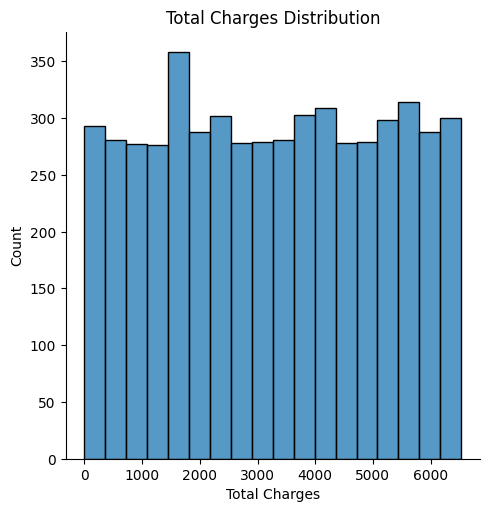

In [17]:
sns.displot(df['TotalCharges']).set(title = 'Total Charges Distribution', xlabel = 'Total Charges', ylabel = 'Count')

### Droping Duplicates (If any exists)

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(5282, 21)

## Checking Imbalance of Churn

In [20]:
df['Churn'].value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

### Checking the Percentage of the Imbalance of Churn

In [21]:
not_churned = (3982 / (1390 + 3982)) * 100
churned = (1390 / (1390 + 3982)) * 100
print('Not Churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))
#[As the the imbalance is less than 80/20, it is a partial imbalance]

Not Churned 74.12509307520476 percent of total people
Churned 25.874906924795233 percent of total people


### Modeling the Imbalance of Churn

[Text(0.5, 1.0, 'Churn Distribution'),
 Text(0.5, 0, 'Churn'),
 Text(0, 0.5, 'Count')]

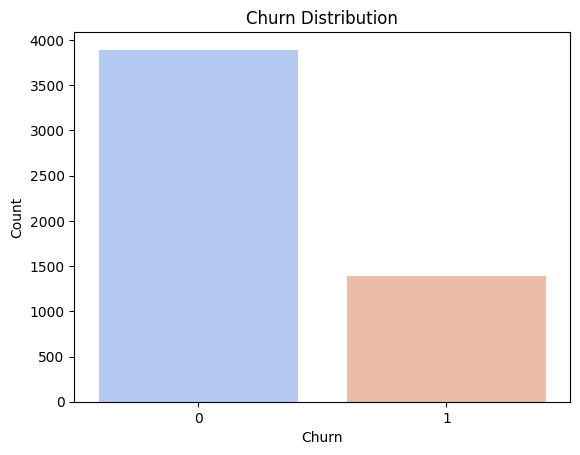

In [22]:
sns.countplot(df, x = 'Churn', palette = 'coolwarm').set(title = 'Churn Distribution', xlabel = 'Churn', ylabel = 'Count')

### Modeing a Countplot to see the Churn Distribution (Genders)

[Text(0.5, 1.0, 'Churn Distribution (Genders)'),
 Text(0.5, 0, 'Churn'),
 Text(0, 0.5, 'Count')]

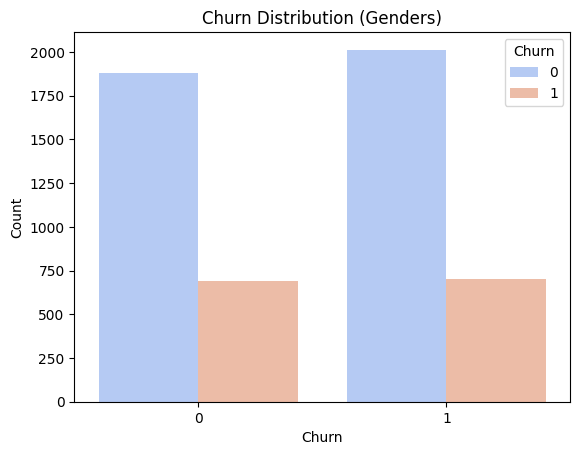

In [23]:
sns.countplot(df, x = 'gender', hue = 'Churn', palette = 'coolwarm').set(title = 'Churn Distribution (Genders)', xlabel = 'Churn', ylabel = 'Count')

## Checking Imbalance of Senior Citizens

In [24]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    4438
1     844
Name: count, dtype: int64

### Printing out the Percentage

In [25]:
not_churned = (4438 / (844 + 4438)) * 100
churned = (844 / (844 + 4438)) * 100
print('Not Churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))
#[As the the imbalance is more than 80/20, it is a total imbalance]

Not Churned 84.0212040893601 percent of total people
Churned 15.97879591063991 percent of total people


### Modeling the Imbalance of Senior Citizens

[Text(0.5, 1.0, 'Senior Citizens Distribution'),
 Text(0.5, 0, 'Churn'),
 Text(0, 0.5, 'Count')]

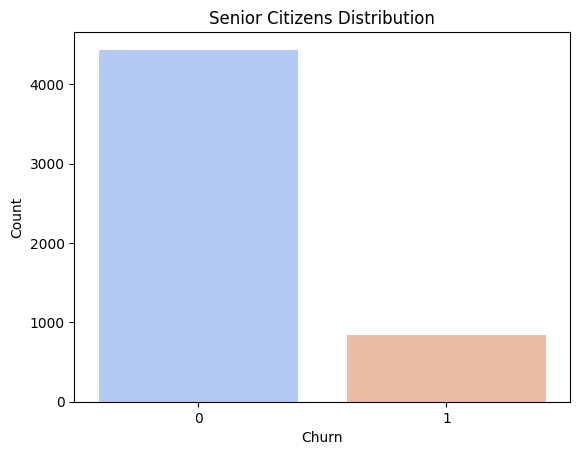

In [26]:
sns.countplot(df, x = 'SeniorCitizen', palette = 'coolwarm').set(title = 'Senior Citizens Distribution', xlabel = 'Churn', ylabel = 'Count')

### Modeing a Countplot to see the Senior Citizens Distribution (Genders)

[Text(0.5, 1.0, 'Senior Citizens Distribution (Genders)'),
 Text(0.5, 0, 'Churn'),
 Text(0, 0.5, 'Count')]

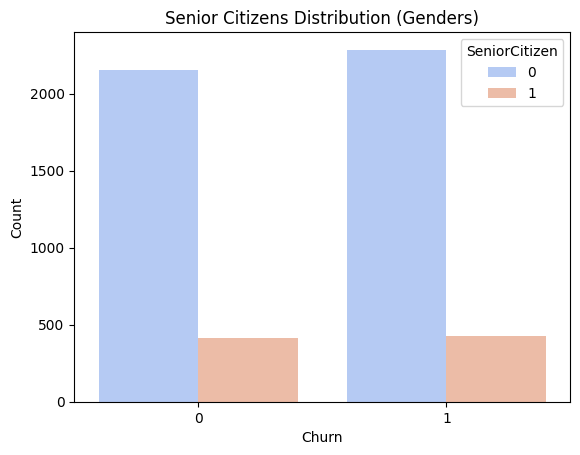

In [27]:
sns.countplot(df, x = 'gender', hue = 'SeniorCitizen', palette = 'coolwarm').set(title = 'Senior Citizens Distribution (Genders)', xlabel = 'Churn', ylabel = 'Count')

## Preprocessing

In [28]:
x = df.drop('Churn', axis = 1)
y = df[['Churn']]

In [29]:
x.shape, y.shape

((5282, 20), (5282, 1))

In [30]:
x.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,6607,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,2598,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2,2345,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
3,4093,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
4,693,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [31]:
y.head()

,Churn
0,1
1,0
2,0
3,0
4,1


## Synthetic Minority Oversampling Technique(SMOTE)

In [32]:
sm = SMOTETomek(random_state = 44)

In [33]:
y.value_counts()

Churn
0        3892
1        1390
Name: count, dtype: int64

In [34]:
sm_x, sm_y = sm.fit_resample(x, y)

In [35]:
sm_y.value_counts()

Churn
0        3537
1        3537
Name: count, dtype: int64

## Near Miss For Under Sampling

In [36]:
nm = NearMiss()

In [37]:
nm_x, nm_y = nm.fit_resample(x, y)

In [38]:
nm_y.value_counts()

Churn
0        1390
1        1390
Name: count, dtype: int64

## Over Sampling

In [39]:
df1.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [40]:
df1.Churn.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [41]:
over = RandomOverSampler(random_state = 44)

In [42]:
over_x, over_y = over.fit_resample(x, y)

In [43]:
over_y.value_counts()

Churn
0        3892
1        3892
Name: count, dtype: int64

## Hold Out Cross Validation

In [44]:
samp_xtrain, samp_xtest, samp_ytrain, samp_ytest = tts(over_x, over_y, random_state = 42)

In [45]:
samp_xtrain.to_csv('Hold Out Cross Validation Trained Data.csv')

In [46]:
train, test = tts(df, test_size = 0.8, random_state = 50)

In [47]:
train.shape, test.shape

((1056, 21), (4226, 21))

In [48]:
train.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4483,357,1,0,1,0,64,1,2,1,0,...,0,2,2,2,2,1,2,105.25,5392,0
411,6509,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,2,25.05,2148,1
2472,5709,0,0,0,0,12,1,0,2,1,...,1,1,1,1,1,0,3,19.30,1920,0
1789,3021,1,0,0,0,5,1,0,2,1,...,1,1,1,1,0,0,3,19.95,133,0
2444,3525,0,1,1,0,50,1,2,1,0,...,2,0,2,0,0,1,2,95.05,4128,1


In [49]:
test.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2273,1278,1,0,1,1,36,0,1,0,2,...,2,2,2,2,1,0,1,60.70,1868,0
2802,3835,0,0,1,1,24,1,0,2,1,...,1,1,1,1,1,0,3,19.90,4455,0
2471,5994,0,0,0,0,42,1,2,1,2,...,2,0,2,2,0,1,2,105.20,3752,1
3388,165,1,0,1,0,69,1,0,2,1,...,1,1,1,1,2,0,3,19.90,659,0
2794,4200,0,0,0,0,65,0,1,0,2,...,2,2,2,2,2,0,1,59.95,3357,0


In [50]:
KNN = KNeighborsClassifier()

In [51]:
KNN.fit(samp_xtrain, samp_ytrain)

KNeighborsClassifier()

In [52]:
samp_pred = KNN.predict(samp_xtest)
samp_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [53]:
samp_acc = accuracy_score(samp_ytest, samp_pred)
samp_acc

0.6366906474820144

## Without Sampling

In [54]:
wosamp_xtrain, wosamp_xtest, wosamp_ytrain, wosamp_ytest = tts(x, y, test_size = 0.3, random_state = 42)

In [55]:
KNN.fit(wosamp_xtrain, wosamp_ytrain)

KNeighborsClassifier()

In [56]:
wosamp_pred = KNN.predict(wosamp_xtest)
wosamp_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [57]:
wosamp_acc = accuracy_score(wosamp_ytest, wosamp_pred)
wosamp_acc

0.677602523659306

## KFold Cross Validation

In [58]:
kfold = KFold(n_splits = 4)

In [59]:
kfold_acc = cross_val_score(KNN, over_x, over_y, cv = kfold)
kfold_acc

array([0.54059609, 0.53905447, 0.63412127, 0.52672148])

In [60]:
kfold_acc.mean()

0.5601233299075026

## Stratified KFold Cross Validation

In [61]:
st = StratifiedKFold(n_splits = 4)

In [62]:
st_acc = cross_val_score(KNN, over_x, over_y, cv = st)
kfold_acc

array([0.54059609, 0.53905447, 0.63412127, 0.52672148])

In [63]:
kfold_acc.mean()

0.5601233299075026

## Leave Out One Cross Validation

In [64]:
loo = LeaveOneOut()

In [65]:
loo_acc = cross_val_score(KNN, over_x, over_y, cv = loo)